In [1]:
#https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
#Special thanks to Balint

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastai.vision.all import *
from fastbook import *
import os

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path

Path('/home/sjmec1/.fastai/data/mnist_png')

In [6]:
#hide
Path.BASE_PATH = path

In [7]:
path.ls()

(#3) [Path('export.pkl'),Path('testing'),Path('training')]

## Putting It All Together

In [8]:
def get_data(dirname,x):
    targetDir = path/dirname/x
    targetImages = targetDir.ls().sorted()
    targetTensors = [tensor(Image.open(o)) for o in targetImages]
    targetStacked = torch.stack(targetTensors).float()/255
    return targetStacked

In [9]:
def get_dataset_len(dirname,x):
    return len((path/dirname/x).ls())

In [10]:
train_x = torch.cat([get_data("training","0"), 
                     get_data("training","1"),
                     get_data("training","2"), 
                     get_data("training","3"),
                     get_data("training","4"), 
                     get_data("training","5"),
                     get_data("training","6"), 
                     get_data("training","7"),
                     get_data("training","8"), 
                     get_data("training","9")]).view(-1, 28*28)   

In [11]:
train_y = tensor([1]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1) 
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [1]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [1]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [1]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [1]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [1]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [1]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [1]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [1]*get_dataset_len("training","8") +
                  [0]*get_dataset_len("training","9")).unsqueeze(1)),1)
train_y = torch.cat((train_y,
           tensor([0]*get_dataset_len("training","0") + 
                  [0]*get_dataset_len("training","1") +
                  [0]*get_dataset_len("training","2") +
                  [0]*get_dataset_len("training","3") +
                  [0]*get_dataset_len("training","4") +
                  [0]*get_dataset_len("training","5") +
                  [0]*get_dataset_len("training","6") +
                  [0]*get_dataset_len("training","7") + 
                  [0]*get_dataset_len("training","8") +
                  [1]*get_dataset_len("training","9")).unsqueeze(1)),1)

In [12]:
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [13]:
valid_x = torch.cat([get_data("testing","0"), 
                     get_data("testing","1"),
                     get_data("testing","2"), 
                     get_data("testing","3"),
                     get_data("testing","4"), 
                     get_data("testing","5"),
                     get_data("testing","6"), 
                     get_data("testing","7"),
                     get_data("testing","8"), 
                     get_data("testing","9")]).view(-1, 28*28)   

In [14]:
valid_y = tensor([1]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1) 
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [1]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [1]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [1]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [1]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [1]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [1]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [1]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [1]*get_dataset_len("testing","8") +
                  [0]*get_dataset_len("testing","9")).unsqueeze(1)),1)
valid_y = torch.cat((valid_y,
           tensor([0]*get_dataset_len("testing","0") + 
                  [0]*get_dataset_len("testing","1") +
                  [0]*get_dataset_len("testing","2") +
                  [0]*get_dataset_len("testing","3") +
                  [0]*get_dataset_len("testing","4") +
                  [0]*get_dataset_len("testing","5") +
                  [0]*get_dataset_len("testing","6") +
                  [0]*get_dataset_len("testing","7") + 
                  [0]*get_dataset_len("testing","8") +
                  [1]*get_dataset_len("testing","9")).unsqueeze(1)),1)

In [15]:
valid_x.shape,valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 10]))

In [73]:
### Simple Net

In [16]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [25]:
def mnist_loss(predictions, targets):
    #predictions = predictions.sigmoid()
    #return torch.where(targets==1, 1-predictions, predictions).mean()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [58]:
def pick_a_file(n):
    if n == 0:   x = '/home/sjmec1/.fastai/data/mnist_png/testing/0/1001.png'
    elif n == 1: x = '/home/sjmec1/.fastai/data/mnist_png/testing/1/1004.png'
    elif n == 2: x = '/home/sjmec1/.fastai/data/mnist_png/testing/2/1002.png'
    elif n == 3: x = '/home/sjmec1/.fastai/data/mnist_png/testing/3/1020.png'
    elif n == 4: x = '/home/sjmec1/.fastai/data/mnist_png/testing/4/1010.png'
    elif n == 5: x = '/home/sjmec1/.fastai/data/mnist_png/testing/5/1003.png'
    elif n == 6: x = '/home/sjmec1/.fastai/data/mnist_png/testing/6/100.png'
    elif n == 7: x = '/home/sjmec1/.fastai/data/mnist_png/testing/7/0.png'
    elif n == 8: x = '/home/sjmec1/.fastai/data/mnist_png/testing/8/1007.png'
    elif n == 9: x = '/home/sjmec1/.fastai/data/mnist_png/testing/9/1000.png'
 
    return x

In [27]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.Softmax(dim=1)
)

In [60]:
def batch_accuracy(xb, yb):
    #preds = xb.sigmoid()
    #correct = (preds>0.5) == yb
    #return correct.float().mean()
    correct = torch.argmax(xb, dim=1) == torch.argmax(yb, dim=1)
    return correct.float().mean()

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=1.0964781722577754e-06)

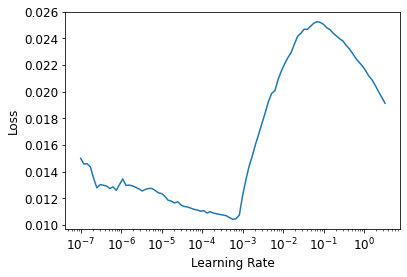

In [65]:
dset = list(zip(train_x,train_y))
valid_dset = list(zip(valid_x,valid_y))

dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(dl, valid_dl)

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,10))
b2 = init_params(10)
params = w1,b1,w2,b2

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.lr_find()

In [66]:
learn.fit(10,1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.065584,0.100056,0.509000,00:01
1,0.065126,0.097372,0.519900,00:01
2,0.065000,0.095899,0.526600,00:01
3,0.064967,0.094701,0.531600,00:01
4,0.065005,0.093518,0.538300,00:01
5,0.065129,0.092425,0.543700,00:01
6,0.065273,0.091485,0.547700,00:01
7,0.065440,0.090671,0.550500,00:01
8,0.065580,0.089871,0.554600,00:01
9,0.065689,0.089082,0.558200,00:01


In [72]:
for i in range (10):

    f=pick_a_file(i);
    targetTensors = tensor(Image.open(f)).float()/255
    targetTensorsv=targetTensors.view(-1,28*28);
    learn.model.eval()
    res=learn.model(targetTensorsv)
    head, tail = os.path.split(f)
    #print(torch.argmax(res))
    buf = "%s" % torch.argmax(res);
    print("Truth:", head[-1],' Detected:', buf[7], "Filename:", tail)      

Truth: 0  Detected: 0 Filename: 1001.png
Truth: 1  Detected: 1 Filename: 1004.png
Truth: 2  Detected: 2 Filename: 1002.png
Truth: 3  Detected: 3 Filename: 1020.png
Truth: 4  Detected: 9 Filename: 1010.png
Truth: 5  Detected: 3 Filename: 1003.png
Truth: 6  Detected: 6 Filename: 100.png
Truth: 7  Detected: 7 Filename: 0.png
Truth: 8  Detected: 9 Filename: 1007.png
Truth: 9  Detected: 9 Filename: 1000.png


### resnet-18

In [ ]:
dlsEasy = ImageDataLoaders.from_folder(path, train="training", valid="testing")

In [ ]:
learnEasy = cnn_learner(dlsEasy, resnet18, pretrained=False,
               loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learnEasy.fit_one_cycle(1, 0.1)

In [ ]:
for i in range (10):
    f=pick_a_file(i);
    targetTensors = tensor(Image.open(f)).float()/255
    targetTensorsRGB=targetTensors.repeat(3, 1, 1)
    learnEasy.model.eval()
    res=learnEasy.model(targetTensorsRGB.view(1,3,28,28).cuda())
    head, tail = os.path.split(f)
    #print(torch.argmax(res))
    buf = "%s" % torch.argmax(res);
    print("Truth:", head[-1],' Detected:', buf[7], "Filename:", tail)


## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.